** Data Collection
This is the section to import and load the bank dataset into my environment **

In [ ]:
import pandas as pd


file_path = r'/content/bank_transactions.csv'

# Loading the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(df.head())
print(df.info())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566


**Data Preprocessing**

Data preprocessing is a critical step in preparing the dataset for analysis and modeling. In this section, we perform various data preprocessing tasks on the provided dataset.

1. Check for Missing Values
Missing values in the dataset can impact the quality of analysis. We begin by checking for missing values in the dataset.
2. Handling Duplicate Records
Duplicate records can distort analysis results. We identify and count duplicate records in the dataset.
3. Remove Duplicate Records (Commented Out)
Although we identify duplicates, we've commented out the removal step to retain them in the current execution.
4. Data Statistics
Calculating summary statistics for numeric columns provides insights into the central tendencies and distributions of the data.
5. Check Data Types
Verifying the data types of each column helps ensure that they are appropriate for further analysis.
6. Drop Rows with Missing Values
Rows containing missing values (NaN) are removed to maintain data integrity.
7. Check for Inconsistent Data
We check for inconsistencies or unexpected values in the 'CustGender' column to ensure data quality.
8. Filter Rows with '00' in 'CustomerDOB' and 'TransactionDate'
This step identifies rows with '00' values or patterns in 'CustomerDOB' and 'TransactionDate' columns.
9. Count Rows with '1/1/1800' or NaN in 'CustomerDOB'
Counting rows with '1/1/1800' or NaN values in 'CustomerDOB' helps identify potential data quality issues.
10. Convert Date Columns to Datetime Format
We convert 'CustomerDOB' and 'TransactionDate' columns to datetime format for consistent date handling.
11. Filter Rows with Customer Birth Year Above 2005
Rows where the birth year is above 2005 are filtered out, as individuals born after 2005 are unlikely to legally have bank accounts.
12. Convert 'TransactionTime' to Time Format
The 'TransactionTime' column is formatted as a time for further analysis and visualization.

These preprocessing steps ensure that the dataset is clean, consistent, and ready for exploratory data analysis (EDA) and other advanced analyses.

In [ ]:
# 1. Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Handling Duplicate Records
duplicate_count = df.duplicated().sum()
print("\nDuplicate Records Count:", duplicate_count)

## 3. Remove Duplicate Records
##df.drop_duplicates(inplace=True)

# 4. Data Statistics
data_statistics = df.describe()
print("\nData Statistics:\n", data_statistics)

# Check Data Types
data_types = df.dtypes
print("Data Types:\n", data_types)



Missing Values:
 TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

Duplicate Records Count: 0

Data Statistics:
        CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06
Data Types:
 Transactio

In [ ]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

# Check for Inconsistent Data (e.g., inconsistent category names)
print(df['CustGender'].value_counts())






M    760978
F    280635
T         1
Name: CustGender, dtype: int64


In [ ]:
# Filter rows with '00' in 'CustomerDOB'
dob_errors = df[df['CustomerDOB'].str.contains('00', na=False)]

# Filter rows with '00' in 'TransactionDate'
date_errors = df[df['TransactionDate'].str.contains('00', na=False)]

# Display rows with errors
print("Rows with '00' in 'CustomerDOB':")
print(dob_errors)

print("\nRows with '00' in 'TransactionDate':")
print(date_errors)


Rows with '00' in 'CustomerDOB':
        TransactionID CustomerID CustomerDOB CustGender  \
16                T17   C1376215    1/1/1800          M   
22                T23   C7018081    1/1/1800          M   
28                T29   C7935438    1/1/1800          M   
35                T36   C1211387    1/1/1800          M   
151              T152   C3334638    1/1/1800          M   
...               ...        ...         ...        ...   
1048443      T1048444   C7261226    1/1/1800          M   
1048452      T1048453   C3813481    1/1/1800          M   
1048531      T1048532   C6937679    1/1/1800          M   
1048533      T1048534   C7431884    1/1/1800          M   
1048540      T1048541   C1528025    1/1/1800          M   

                     CustLocation  CustAccountBalance TransactionDate  \
16                         MUMBAI            77495.15          1/8/16   
22       WAYS PANCHKUVA AHMEDABAD              143.07          3/8/16   
28                         MOHALI      

In [ ]:
# Count rows with '1/1/1800' or NaN in 'CustomerDOB'
error_count = df[(df['CustomerDOB'] == '1/1/1800') | df['CustomerDOB'].isnull()].shape[0]

# Display the count of rows with potential errors
print("Number of Rows with '1/1/1800' or NaN in 'CustomerDOB':", error_count)

Number of Rows with '1/1/1800' or NaN in 'CustomerDOB': 56292


In [ ]:

# Drop rows with 'CustomerDOB' equal to '1/1/1800'
df = df[df['CustomerDOB'] != '1/1/1800']

# Reset the index to maintain a continuous index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame without the rows containing '1/1/1800'
print(df)

       TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                 T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                 T2   C2142763      4/4/57          M        JHAJJAR   
2                 T3   C4417068    26/11/96          F         MUMBAI   
3                 T4   C5342380     14/9/73          F         MUMBAI   
4                 T5   C9031234     24/3/88          F    NAVI MUMBAI   
...              ...        ...         ...        ...            ...   
985317      T1048563   C8020229      8/4/90          M      NEW DELHI   
985318      T1048564   C6459278     20/2/92          M         NASHIK   
985319      T1048565   C6412354     18/5/89          M      HYDERABAD   
985320      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
985321      T1048567   C8337524      5/3/84          M           PUNE   

        CustAccountBalance TransactionDate  TransactionTime  \
0                 17819.05          2/8/16           143207 

In [ ]:
# Convert 'CustomerDOB' and 'TransactionDate' to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')

# Extract Month Name and Day Name from 'TransactionDate'
df['TransactionMonthName'] = df['TransactionDate'].dt.strftime('%B')  # Full month name
df['TransactionDayName'] = df['TransactionDate'].dt.strftime('%A')    # Full day name

#Fist off we need to get the latest date in order to get recency
latest_transaction_date = df['TransactionDate'].max()
print(latest_transaction_date)

# Display the updated DataFrame
print(df)

2016-10-21 00:00:00
       TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                 T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                 T2   C2142763  2057-04-04          M        JHAJJAR   
2                 T3   C4417068  1996-11-26          F         MUMBAI   
3                 T4   C5342380  1973-09-14          F         MUMBAI   
4                 T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...              ...        ...         ...        ...            ...   
985317      T1048563   C8020229  1990-04-08          M      NEW DELHI   
985318      T1048564   C6459278  1992-02-20          M         NASHIK   
985319      T1048565   C6412354  1989-05-18          M      HYDERABAD   
985320      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
985321      T1048567   C8337524  1984-03-05          M           PUNE   

        CustAccountBalance TransactionDate  TransactionTime  \
0                 17819.05      2016-08-

In [ ]:
#this is done because anybody above 1998 would be younger than 18 so they should not be legally old enough to have an account
# Define the minimum allowed birth year (1998)
min_birth_year = pd.to_datetime('2005-01-01')

# Filter and drop rows where the year of birth is greater than 2005
df = df[df['CustomerDOB'].dt.year <= 2005]

# Reset the index to maintain a continuous index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame without rows where the year of birth is above 2005
print(df)

       TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                 T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                 T3   C4417068  1996-11-26          F         MUMBAI   
2                 T4   C5342380  1973-09-14          F         MUMBAI   
3                 T5   C9031234  1988-03-24          F    NAVI MUMBAI   
4                 T6   C1536588  1972-10-08          F       ITANAGAR   
...              ...        ...         ...        ...            ...   
930953      T1048563   C8020229  1990-04-08          M      NEW DELHI   
930954      T1048564   C6459278  1992-02-20          M         NASHIK   
930955      T1048565   C6412354  1989-05-18          M      HYDERABAD   
930956      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
930957      T1048567   C8337524  1984-03-05          M           PUNE   

        CustAccountBalance TransactionDate  TransactionTime  \
0                 17819.05      2016-08-02           143207 

In [ ]:
# Convert 'TransactionTime' to a string
df['TransactionTime'] = df['TransactionTime'].astype(str)

# Ensure 'TransactionTime' has 6 digits, adding leading zeros if needed
df['TransactionTime'] = df['TransactionTime'].str.zfill(6)

# Split 'TransactionTime' into hours, minutes, and seconds
df['TransactionHour'] = df['TransactionTime'].str[:2]
df['TransactionMinute'] = df['TransactionTime'].str[2:4]
df['TransactionSecond'] = df['TransactionTime'].str[4:6]

# Create a new 'TransactionTimeFormatted' column with the formatted time
df['TransactionTimeFormatted'] = (
    df['TransactionHour'] + ':' +
    df['TransactionMinute'] + ':' +
    df['TransactionSecond']
)

# Dropping the intermediate columns and the initial TransactionTime columns beacuse it is not needed
df.drop(['TransactionHour', 'TransactionMinute', 'TransactionSecond', 'TransactionTime'], axis=1, inplace=True)

# Converting the 'TransactionTimeFormatted' column to time format
df['TransactionTimeFormatted'] = pd.to_datetime(df['TransactionTimeFormatted'], format='%H:%M:%S').dt.time


print(df)


       TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                 T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                 T3   C4417068  1996-11-26          F         MUMBAI   
2                 T4   C5342380  1973-09-14          F         MUMBAI   
3                 T5   C9031234  1988-03-24          F    NAVI MUMBAI   
4                 T6   C1536588  1972-10-08          F       ITANAGAR   
...              ...        ...         ...        ...            ...   
930953      T1048563   C8020229  1990-04-08          M      NEW DELHI   
930954      T1048564   C6459278  1992-02-20          M         NASHIK   
930955      T1048565   C6412354  1989-05-18          M      HYDERABAD   
930956      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
930957      T1048567   C8337524  1984-03-05          M           PUNE   

        CustAccountBalance TransactionDate  TransactionAmount (INR)  \
0                 17819.05      2016-08-02          

**RFM Columns and Additional Features**

In this section, we create RFM (Recency, Frequency, Monetary) columns and additional features based on the provided dataset. RFM analysis is commonly used in customer segmentation and behavior analysis.

Recency
Recency is calculated as the number of days since the last transaction for each customer. It represents how recently a customer has made a purchase.
Frequency
Frequency is calculated by counting the number of transactions for each customer. It indicates how often a customer makes purchases.
Monetary
Monetary represents the total monetary value of transactions for each customer. It reflects how much
Age is computed as the number of years since the customer's date of birth. It provides the age of each customer in years.
Transaction Year
The TransactionYear column is created to extract the year from the 'TransactionDate,' providing insights into the year of each transaction.
Transaction Month
The TransactionMonth column is created to extract the month from the 'TransactionDate,' allowing analysis at the monthly level.
Weekend Transaction
The 'WeekendTransaction' column is a binary feature that indicates whether a transaction occurred on a weekend .
These newly created columns provide valuable information for customer segmentation, behavioral analysis, and understanding transaction patterns. The RFM metrics (Recency, Frequency, Monetary) are particularly useful for segmenting customers into different groups based on their transaction behavior.

The resulting DataFrame with RFM columns and additional features will be used for further analysis and segmentation of customers based on their transaction behavior and demographics.






**Feature Engineering**


In [ ]:
#We are going to start by creating RFM columns that would be useful for te EDA
#Recency- Number of days since last transcation
#Frequency - Number of tracsactions
#Monetary- Total Monetary of transactions

Current_date = pd.to_datetime('2016-10-21')

df['Recency'] = (Current_date - df['TransactionDate']).dt.days
df['Frequency'] = df.groupby('CustomerID')['CustomerID'].transform('count')
df['Monetary'] = df['TransactionAmount (INR)']

df['Age'] = (Current_date - df['CustomerDOB']).dt.days // 365  # Age in years

# You can create features related to transaction date:
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month

# You can create a feature to indicate if a transaction occurred on a weekend:
df['WeekendTransaction'] = df['TransactionDate'].dt.dayofweek.isin([5, 6])

# Display the updated DataFrame with RFM and additional features
print(df)







       TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                 T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                 T3   C4417068  1996-11-26          F         MUMBAI   
2                 T4   C5342380  1973-09-14          F         MUMBAI   
3                 T5   C9031234  1988-03-24          F    NAVI MUMBAI   
4                 T6   C1536588  1972-10-08          F       ITANAGAR   
...              ...        ...         ...        ...            ...   
930953      T1048563   C8020229  1990-04-08          M      NEW DELHI   
930954      T1048564   C6459278  1992-02-20          M         NASHIK   
930955      T1048565   C6412354  1989-05-18          M      HYDERABAD   
930956      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
930957      T1048567   C8337524  1984-03-05          M           PUNE   

        CustAccountBalance TransactionDate  TransactionAmount (INR)  \
0                 17819.05      2016-08-02          

**Exploratory Data Analysis (EDA)**
Summary Statistics: We compute summary statistics for the columns 'Recency,' 'Frequency,' 'Monetary,' and 'Age.' The summary statistics provide an overview of the central tendencies and dispersions of these features.

Distribution Plots: We create distribution plots to visualize the distribution of the following features:

1.   Recency
2.   Frequency
3. Monetary
4. Age
5. Transactions by Month
6. Transactions by day of the Week

**Gender and Location Analysis**: We group the data by gender and location to calculate statistics on customer counts, account balances, and transaction counts. We then create bar plots to visualize the top 10 countries for:

1. Most Transactions
2. Highest Balance
3. Most Customers

**Behavioral Segmentation**: We define and assign customer segments based on transaction behavior:

1. Big Spenders: High 'Monetary' values.
2. Occasional Shoppers: Low 'Frequency' but moderate 'Monetary.'
3. Inactive Customers: Low 'Frequency' and 'Monetary.'

**Weekday vs. Weekend Shoppers**: We assign customer segments based on shopping behavior during weekdays and weekends. We create a bar plot to visualize the distribution of customers in each segment.

**Customer Segmentation (K-Means)**: We perform K-means clustering on the RFM metrics (Recency, Frequency, Monetary) to segment customers into groups. We use the Elbow Method to determine the optimal number of clusters and then apply K-means with the chosen K value. A 3D scatter plot is created to visualize the customer segmentation in terms of RFM metrics.

The provided code demonstrates how each of these preprocessing and EDA steps is performed on the dataset. These steps help us gain insights into customer behavior and prepare the data for further analysis or segmentation.

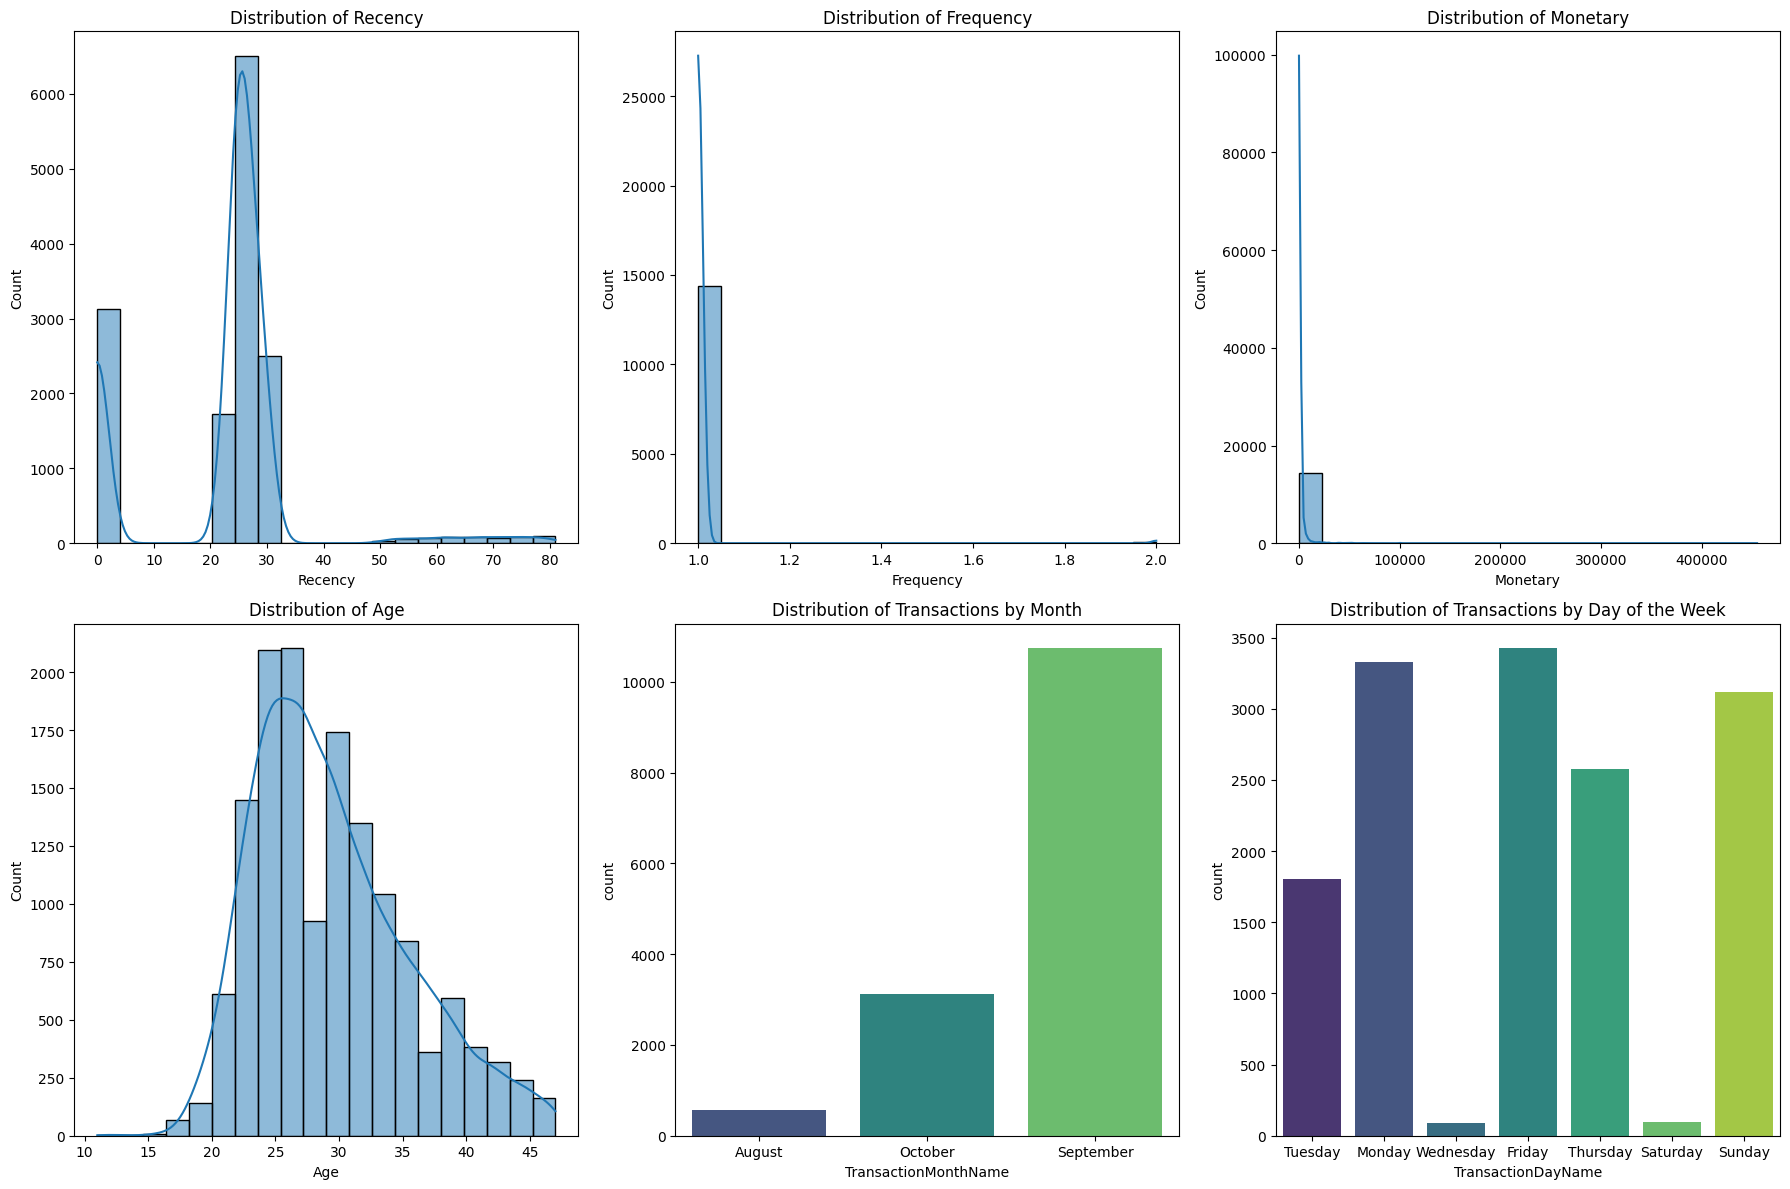

Summary Statistics:
            Recency     Frequency       Monetary           Age
count  14442.000000  14442.000000   14442.000000  14442.000000
mean      22.066819      1.005124    1415.439139     29.391982
std       14.212457      0.071401    6543.308927      6.125254
min        0.000000      1.000000       0.000000     11.000000
25%       24.000000      1.000000     140.000000     25.000000
50%       25.000000      1.000000     380.000000     28.000000
75%       26.000000      1.000000    1000.000000     33.000000
max       81.000000      2.000000  455122.000000     47.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary Statistics
summary_stats = df[['Recency', 'Frequency', 'Monetary', 'Age']].describe()

# Set a larger figure size for better visualization
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency')

plt.subplot(2, 3, 2)
sns.histplot(df['Frequency'], bins=20, kde=True)
plt.title('Distribution of Frequency')

plt.subplot(2, 3, 3)
sns.histplot(df['Monetary'], bins=20, kde=True)
plt.title('Distribution of Monetary')

plt.subplot(2, 3, 4)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='TransactionMonthName', palette='viridis')
plt.title('Distribution of Transactions by Month')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='TransactionDayName', palette='viridis')
plt.title('Distribution of Transactions by Day of the Week')

# Remove overlapping axes
plt.tight_layout()

# Show the plots
plt.show()

# Display Summary Statistics
print("Summary Statistics:")
print(summary_stats)

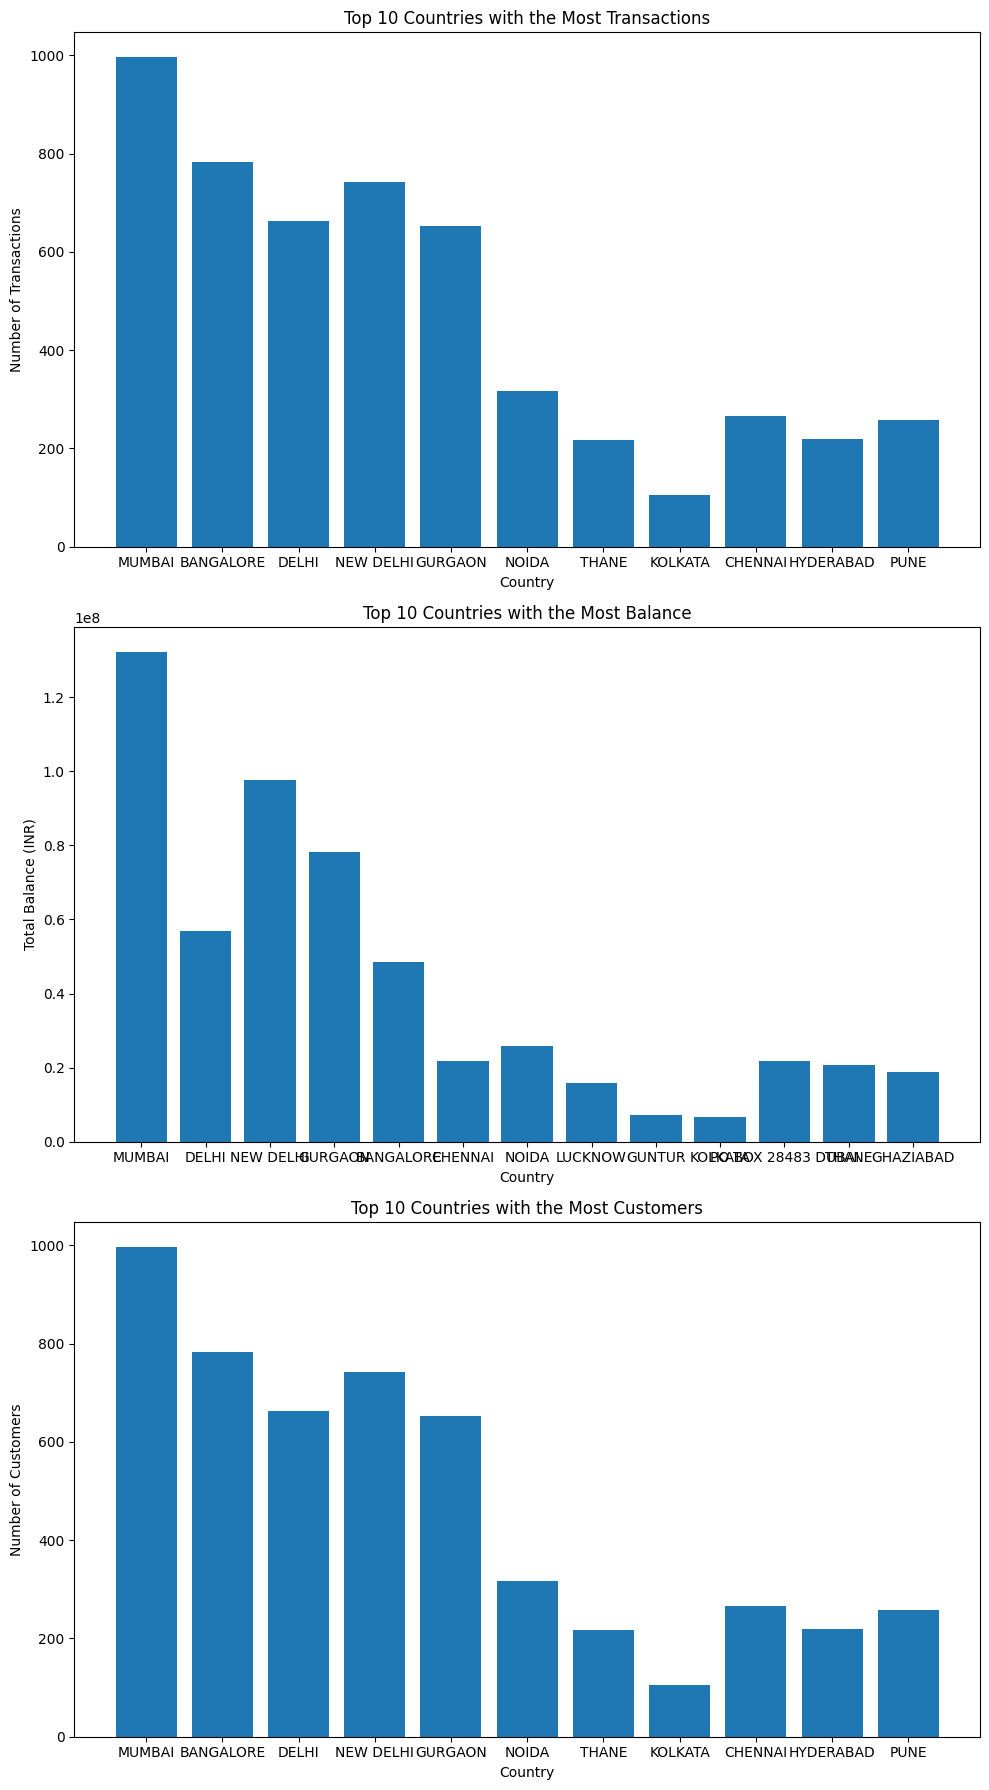

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Group data by gender and country and calculate relevant statistics
gender_country_stats = df.groupby(['CustGender', 'CustLocation']).agg({
    'CustomerID': 'nunique',  # Count unique customers
    'CustAccountBalance': 'sum',  # Sum of account balances
    'TransactionID': 'count'  # Count of transactions
}).reset_index()



# Get the top 10 countries for each statistic
top_10_transactions = gender_country_stats.sort_values(by=['CustGender', 'TransactionID'], ascending=[True, False]).groupby('CustGender').head(10)
top_10_balance = gender_country_stats.sort_values(by=['CustGender', 'CustAccountBalance'], ascending=[True, False]).groupby('CustGender').head(10)
top_10_customers = gender_country_stats.sort_values(by=['CustGender', 'CustomerID'], ascending=[True, False]).groupby('CustGender').head(10)

# Create subplots for each category
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot top 10 countries with the most transactions
plt.subplot(3, 1, 1)
plt.bar(top_10_transactions['CustLocation'], top_10_transactions['TransactionID'])
plt.title('Top 10 Countries with the Most Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')

# Plot top 10 countries with the most balance
plt.subplot(3, 1, 2)
plt.bar(top_10_balance['CustLocation'], top_10_balance['CustAccountBalance'])
plt.title('Top 10 Countries with the Most Balance')
plt.xlabel('Country')
plt.ylabel('Total Balance (INR)')

# Plot top 10 countries with the most customers
plt.subplot(3, 1, 3)
plt.bar(top_10_customers['CustLocation'], top_10_customers['CustomerID'])
plt.title('Top 10 Countries with the Most Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


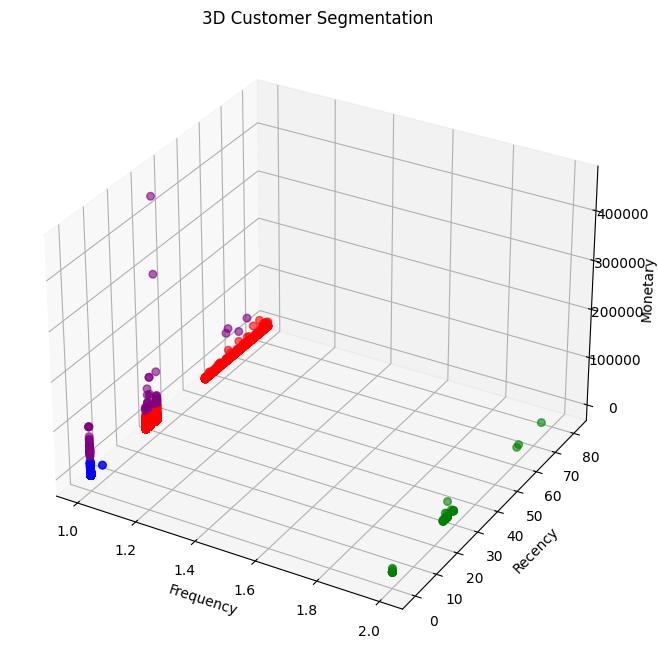

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D



# Select the features for segmentation
X = df[['Frequency', 'Recency', 'Monetary']]

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (you can adjust this based on your needs)
n_clusters = 4  # Change to the desired number of clusters

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a 3D scatter plot to visualize the segmentation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster (adjust as needed)
cluster_colors = ['red', 'green', 'blue', 'purple']  # You can add more colors if needed

# Map cluster labels to colors
df['ClusterColor'] = df['Cluster'].map(lambda cluster: cluster_colors[cluster])

# Scatter plot using 3D coordinates
ax.scatter(df['Frequency'], df['Recency'], df['Monetary'], c=df['ClusterColor'], s=30, alpha=0.6)

# Customize plot labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation')

# Show the 3D scatter plot
plt.show()

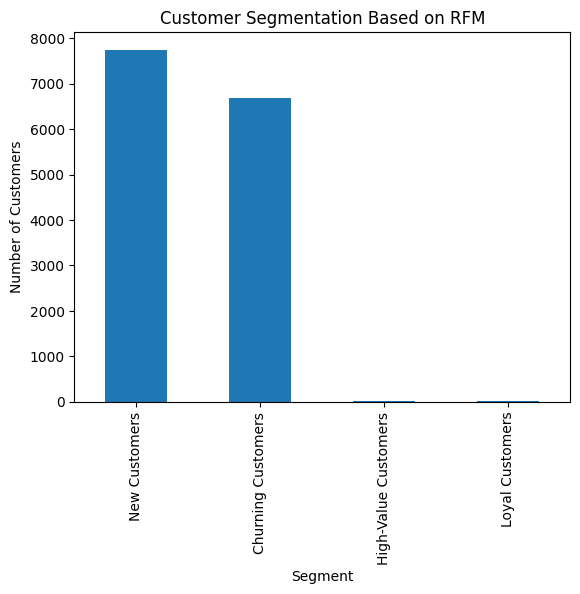

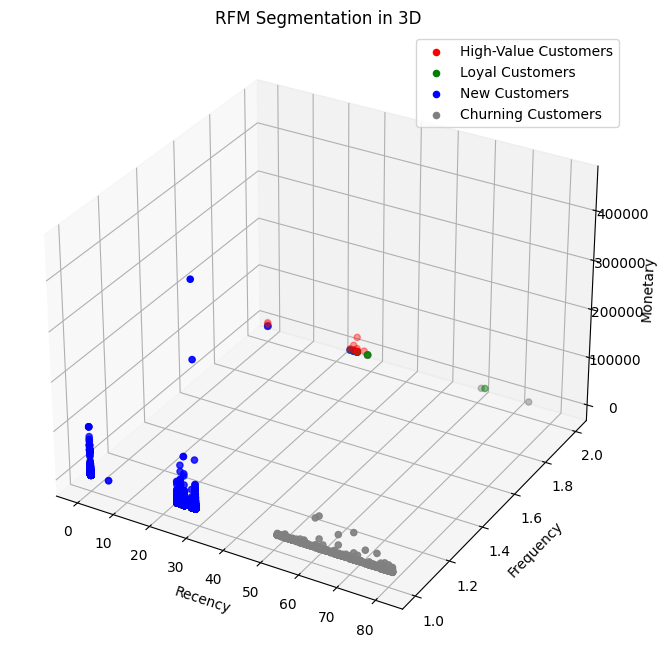

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Assuming you have calculated RFM scores as 'Recency', 'Frequency', and 'Monetary'

# Define segmentation criteria and assign segments
def assign_rfm_segment(row):
    if row['Recency'] <= 50 and row['Frequency'] >= 2 and row['Monetary'] >= 1500:
        return 'High-Value Customers'
    elif row['Frequency'] >= 2 and row['Monetary'] >= 700:
        return 'Loyal Customers'
    elif row['Recency'] <= 50 and row['Monetary'] >= 300:
        return 'New Customers'
    else:
        return 'Churning Customers'

df['RFM_Segment'] = df.apply(assign_rfm_segment, axis=1)

# Visualize the distribution of customers across segments using a bar plot
segment_counts = df['RFM_Segment'].value_counts()
segment_counts.plot(kind='bar')
plt.title('Customer Segmentation Based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Visualize RFM segmentation on a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each segment
colors = {
    'High-Value Customers': 'red',
    'Loyal Customers': 'green',
    'New Customers': 'blue',
    'Churning Customers': 'gray'
}

# Map segment names to colors
df['SegmentColor'] = df['RFM_Segment'].map(colors)

# Create the 3D scatter plot
scatter = ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['SegmentColor'], marker='o')

# Set axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Create a legend for segments
for segment, color in colors.items():
    ax.scatter([], [], [], c=color, label=segment)

# Show the legend
ax.legend()

# Show the 3D scatter plot
plt.title('RFM Segmentation in 3D')
plt.show()


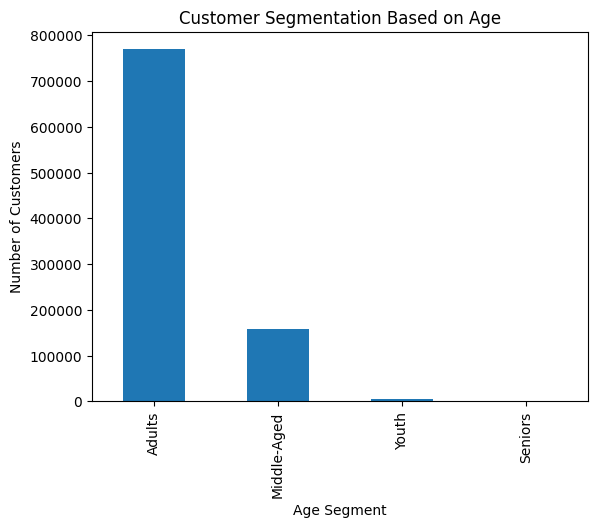

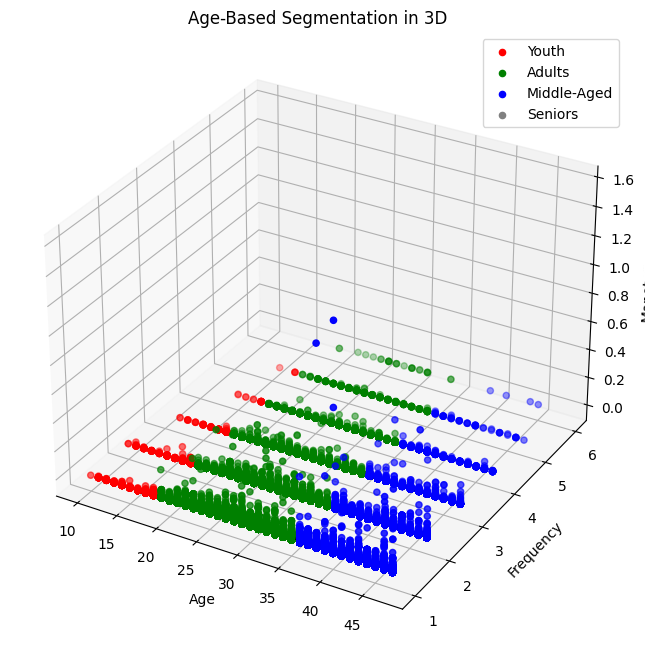

In [ ]:
# Define age-based segmentation criteria and assign segments
age_bins = [0, 18, 35, 50, float('inf')]  # Define age bins (e.g., Youth, Adults, Middle-Aged, Seniors)
age_labels = ['Youth', 'Adults', 'Middle-Aged', 'Seniors']

df['AgeSegment'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Visualize the distribution of customers across age segments using a bar plot
age_segment_counts = df['AgeSegment'].value_counts()
age_segment_counts.plot(kind='bar')
plt.title('Customer Segmentation Based on Age')
plt.xlabel('Age Segment')
plt.ylabel('Number of Customers')
plt.show()

# Visualize age-based segmentation on a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each age segment
colors = {
    'Youth': 'red',
    'Adults': 'green',
    'Middle-Aged': 'blue',
    'Seniors': 'gray'
}

# Map age segment names to colors
df['AgeSegmentColor'] = df['AgeSegment'].map(colors)

# Create the 3D scatter plot
scatter = ax.scatter(df['Age'], df['Frequency'], df['Monetary'], c=df['AgeSegmentColor'], marker='o')

# Set axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Create a legend for age segments
for age_segment, color in colors.items():
    ax.scatter([], [], [], c=color, label=age_segment)

# Show the legend
ax.legend()

# Show the 3D scatter plot
plt.title('Age-Based Segmentation in 3D')
plt.show()

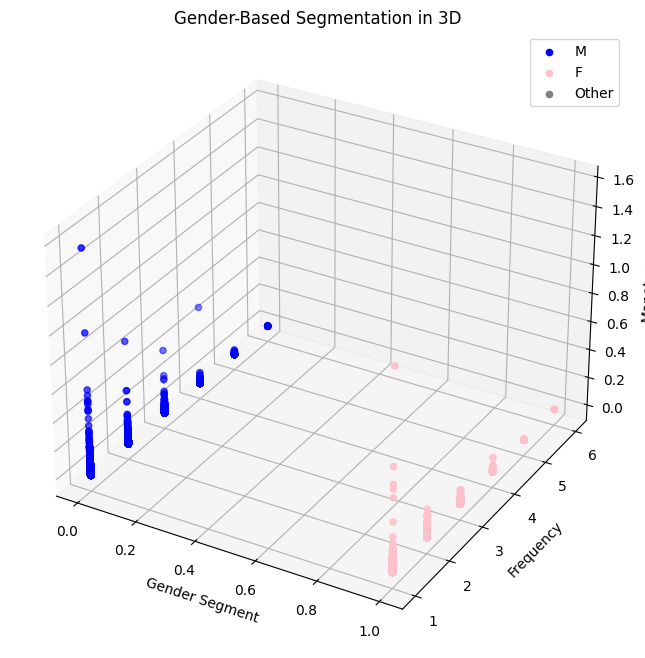

In [ ]:
from mpl_toolkits.mplot3d import Axes3D



# Define gender-based segmentation criteria and assign numeric labels
gender_mapping = {'M': 0, 'F': 1, 'Other': 2}
df['GenderSegment'] = df['CustGender'].map(gender_mapping)

# Visualize gender-based segmentation on a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each gender segment
colors = {
    0: 'blue',   # Male
    1: 'pink',   # Female
    2: 'gray'    # Other
}

# Create the 3D scatter plot
scatter = ax.scatter(df['GenderSegment'], df['Frequency'], df['Monetary'], c=df['GenderSegment'].map(colors), marker='o')

# Set axis labels
ax.set_xlabel('Gender Segment')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Create a legend for gender segments
for gender_code, color in colors.items():
    ax.scatter([], [], [], c=color, label=list(gender_mapping.keys())[list(gender_mapping.values()).index(gender_code)])

# Show the legend
ax.legend()

# Show the 3D scatter plot
plt.title('Gender-Based Segmentation in 3D')
plt.show()


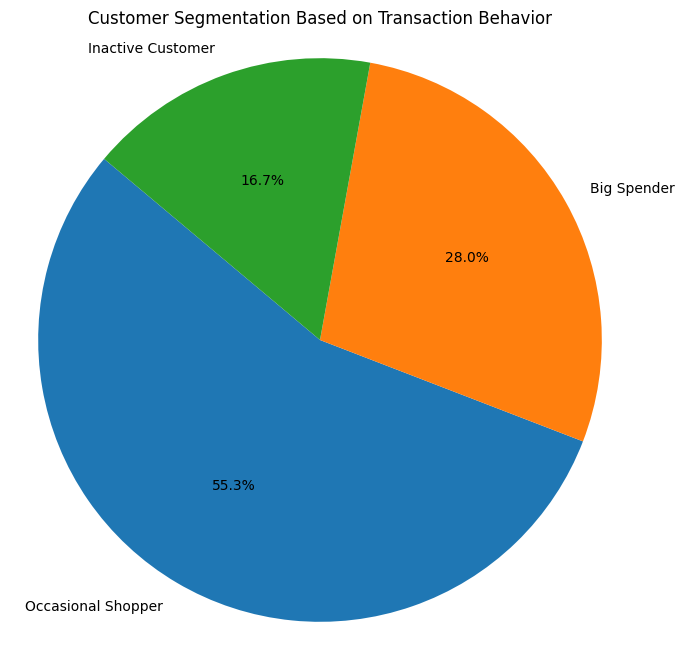

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define transaction behavior-based segmentation criteria and assign segments
def assign_transaction_segment(row):
    if row['Monetary'] >= 1000:
        return 'Big Spender'
    #elif row['Frequency'] >= 5:
        #return 'Frequent Shopper'
    elif row['Frequency'] > 0 and row['Monetary'] >= 100:
        return 'Occasional Shopper'
    else:
        return 'Inactive Customer'

df['TransactionSegment'] = df.apply(assign_transaction_segment, axis=1)

# Visualize the distribution of customers across transaction behavior segments using a pie chart
segment_counts = df['TransactionSegment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation Based on Transaction Behavior')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


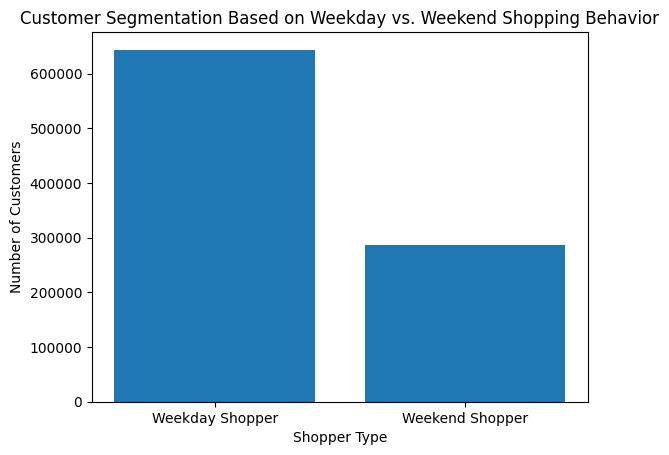

In [ ]:
# Define weekday vs. weekend segmentation criteria and assign segments
def assign_weekday_weekend_segment(row):
    if row['TransactionDayName'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'Weekday Shopper'
    else:
        return 'Weekend Shopper'

df['WeekdayWeekendSegment'] = df.apply(assign_weekday_weekend_segment, axis=1)

# Visualize the distribution of customers across weekday vs. weekend shopper segments using a bar plot
segment_counts = df['WeekdayWeekendSegment'].value_counts()
plt.bar(segment_counts.index, segment_counts)
plt.xlabel('Shopper Type')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Based on Weekday vs. Weekend Shopping Behavior')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

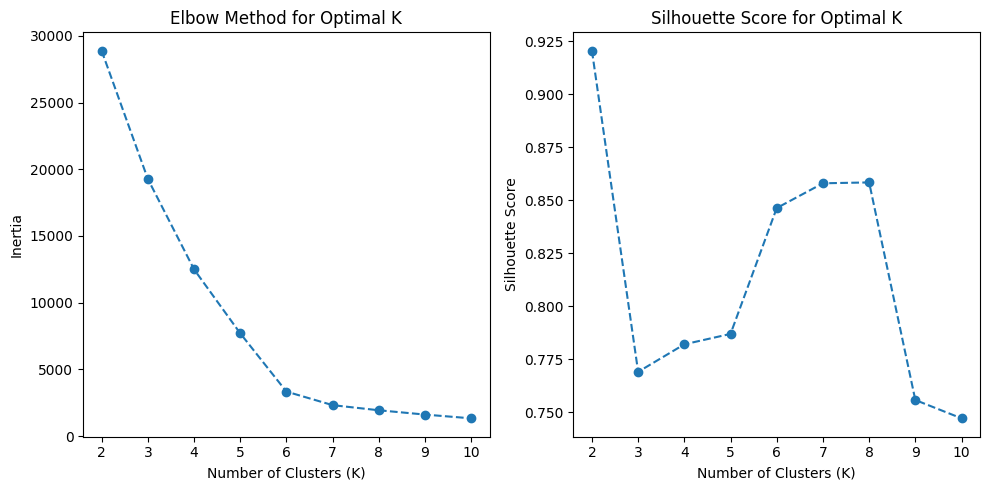

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Monetary  Frequency   Recency
Cluster                               
0       -0.033175  -0.071766  0.429782
1        0.018408  13.934208 -0.077917
2        0.119214  -0.071766 -1.548204


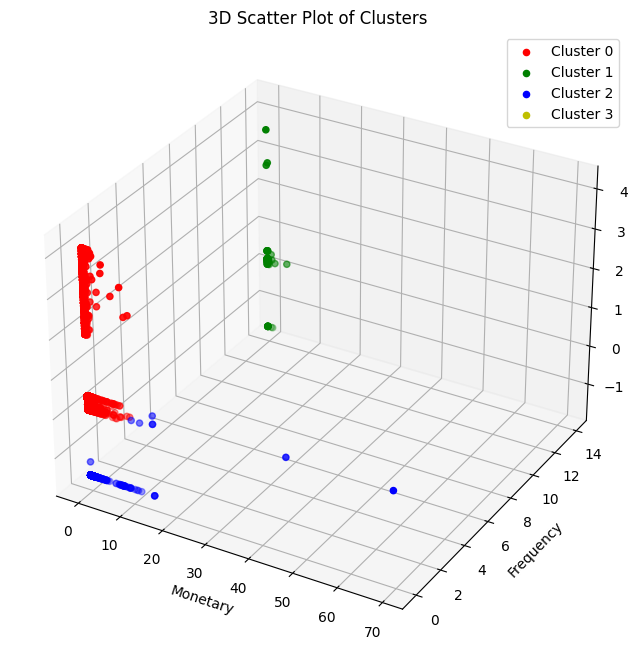

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the behavioral features (e.g., Monetary, Frequency, Recency)
scaler = StandardScaler()
df[['Monetary', 'Frequency', 'Recency']] = scaler.fit_transform(df[['Monetary', 'Frequency', 'Recency']])

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find the optimal number of clusters using the Elbow Method
inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Monetary', 'Frequency', 'Recency']])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['Monetary', 'Frequency', 'Recency']], kmeans.labels_))

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()

# Apply K-Means clustering with the chosen K value
k = 4  # Example K value
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Monetary', 'Frequency', 'Recency']])

# Analyze the clusters
cluster_means = df.groupby('Cluster')[['Monetary', 'Frequency', 'Recency']].mean()
print(cluster_means)
